# Punto 02 del Informe de Machine Learning

### Importaciones

In [1]:
import sklearn
import numpy as np
import pandas as pd

### 1. Leer los datos del archivo titanic.csv.
#### Si el archivo se encuentra en su carpeta, corra el primer bloque, de no ser así, ejecute el segundo.

In [2]:
direccion = ("./data/titanic.csv")
datos = pd.read_csv(direccion, sep=";")

datos.columns = ["survived", "Name", "pclass", "sex", "age", "sibsp", "parch", "fare", "who", "embark_town", "alone"]

In [3]:
url = ("https://raw.githubusercontent.com/karenmoreno17/Informe-Machine-Learning/main/data/titanic.csv")
datos = pd.read_csv(url, sep=";")

datos.columns = ["survived", "Name", "pclass", "sex", "age", "sibsp", "parch", "fare", "who", "embark_town", "alone"]

### 2. Eliminación del atributo Name.

In [4]:
datos.drop(["Name"], axis = 1, inplace = True)

### 3. Selección del 80% de datos para entrenar, y el 20% restante para las pruebas.

In [5]:
from sklearn.model_selection import train_test_split 

n = len(datos)
datosEntreno = int(n * 0.8) #El 80% para entrenar y el 20% para las pruebas.
datosPruebas = n - datosEntreno
print(n, datosEntreno, datosPruebas)
train_data, test_data = sklearn.model_selection.train_test_split(datos, train_size = datosEntreno, test_size = datosPruebas)

891 712 179


In [6]:
train_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,embark_town,alone
368,1,3,female,NaN,0,0,7.7500,woman,Queenstown,yes
888,0,3,female,NaN,1,2,23.4500,woman,Southampton,no
526,1,2,female,50.0,0,0,10.5000,woman,Southampton,yes
303,1,2,female,NaN,0,0,12.3500,woman,Queenstown,yes
484,1,1,male,25.0,1,0,91.0792,man,Cherbourg,no


### 4. Normalizar los datos.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 368 to 312
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   sex          712 non-null    object 
 3   age          565 non-null    float64
 4   sibsp        712 non-null    int64  
 5   parch        712 non-null    int64  
 6   fare         712 non-null    float64
 7   who          712 non-null    object 
 8   embark_town  710 non-null    object 
 9   alone        712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


In [8]:
# Variables cuantitativas (de tipo flotante).
datos.select_dtypes(include = ['float64']).describe()

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [9]:
# Variables cuantitativas (de tipo entero).
datos.select_dtypes(include = ['int64']).describe()

,survived,pclass,sibsp,parch
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594
std,0.486592,0.836071,1.102743,0.806057
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000
max,1.000000,3.000000,8.000000,6.000000


In [10]:
# Y variables categóricas (de tipo object).
datos.select_dtypes(include = ['object']).describe()

,sex,who,embark_town,alone
count,891,891,889,891
unique,2,3,3,2
top,male,man,Southampton,yes
freq,577,537,644,537


In [11]:
# ============================================================================================================================================================
# Pipeline para las variables cuantitativas.
# ============================================================================================================================================================

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Tenemos 6 variables cuantitativas
varCuantitativas = ['pclass', 'sibsp', 'parch', 'age', 'fare']

cuantiPipeline = Pipeline([
        ("imputer", SimpleImputer(strategy = "median")),
        ("scaler", StandardScaler()) 
    
    ])

In [12]:
# ============================================================================================================================================================
# Pipeline para las variables categóricas.
# ============================================================================================================================================================

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 6 atributos categóricos
varCategoricas = ['sex', 'who', 'embark_town', 'alone']

catePipeline = Pipeline([
        ("imputer", SimpleImputer(strategy = "most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse_output = False))
    ])

In [13]:
# ============================================================================================================================================================
# Pipeline completo.
# ============================================================================================================================================================

from sklearn.compose import ColumnTransformer

pipelineCompleto = ColumnTransformer([
    ("cuanti", cuantiPipeline, varCuantitativas),
    ("cate", catePipeline, varCategoricas), 
])

In [14]:
X_train = pipelineCompleto.fit_transform(train_data)
X_train.shape

(712, 15)

In [15]:
# Asignamos la variable dependiente, que para esta ocasión, es "survived"
Y_train = train_data['survived']
Y_train

368    1
888    0
526    1
303    1
484    1
      ..
79     1
389    1
175    0
715    0
312    0
Name: survived, Length: 712, dtype: int64

### 5. Árboles de decisión.

[0.80555556 0.80555556 0.85915493 0.84507042 0.78873239 0.77464789
 0.8028169  0.70422535 0.71830986 0.78873239]
0.7892801251956182


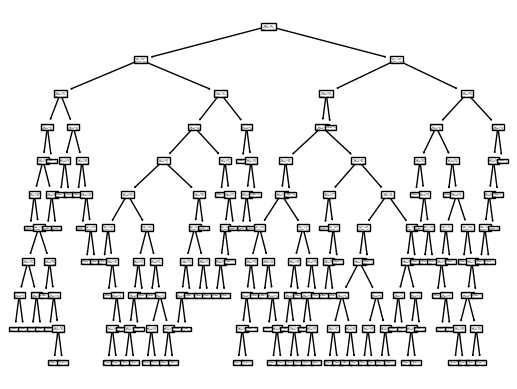

In [16]:
# ============================================================================================================================================================
# Primer árbol de decisión.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol1 = tree.DecisionTreeClassifier(criterion = 'gini', splitter = "best", max_depth = 10,  random_state = 123)
arbol1.fit(X_train, Y_train)
scores1 = cross_val_score(arbol1, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores1)
print(scores1.mean())

tree.plot_tree(arbol1)
tree.export_graphviz(decision_tree = arbol1, class_names = True, out_file = "arbolesPunto5\Arbol1.dot")


[0.77777778 0.80555556 0.83098592 0.81690141 0.76056338 0.74647887
 0.77464789 0.69014085 0.63380282 0.83098592]
0.7667840375586854


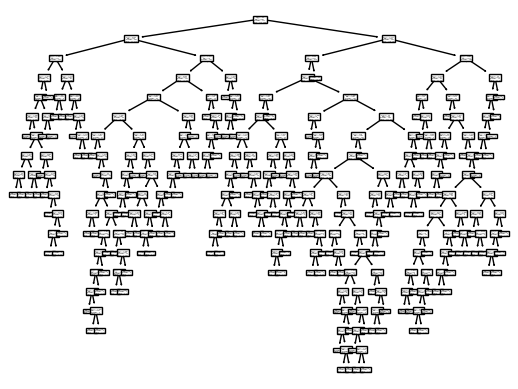

In [17]:
# ============================================================================================================================================================
# Segundo árbol de decisión.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol2 = tree.DecisionTreeClassifier(criterion = 'gini', splitter = "best", max_depth = 20,  random_state = 123)
arbol2.fit(X_train, Y_train)
scores2 = cross_val_score(arbol2, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores2)
print(scores2.mean())

tree.plot_tree(arbol2)
tree.export_graphviz(decision_tree = arbol2, class_names = True, out_file = "arbolesPunto5\Arbol2.dot")

[0.77777778 0.80555556 0.83098592 0.81690141 0.76056338 0.74647887
 0.77464789 0.69014085 0.63380282 0.84507042]
0.7681924882629108


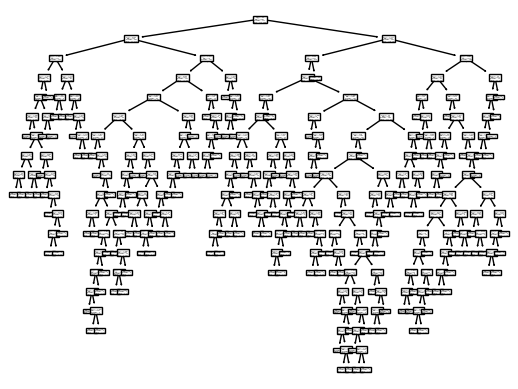

In [18]:
# ============================================================================================================================================================
# Tercer árbol de decisión.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol3 = tree.DecisionTreeClassifier(criterion = 'gini', splitter = "best", max_depth = 30,  random_state = 123)
arbol3.fit(X_train, Y_train)
scores3 = cross_val_score(arbol3, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores3)
print(scores3.mean())

tree.plot_tree(arbol3)
tree.export_graphviz(decision_tree = arbol3, class_names = True, out_file = "arbolesPunto5\Arbol3.dot")

[0.77777778 0.80555556 0.83098592 0.81690141 0.76056338 0.74647887
 0.77464789 0.69014085 0.63380282 0.84507042]
0.7681924882629108


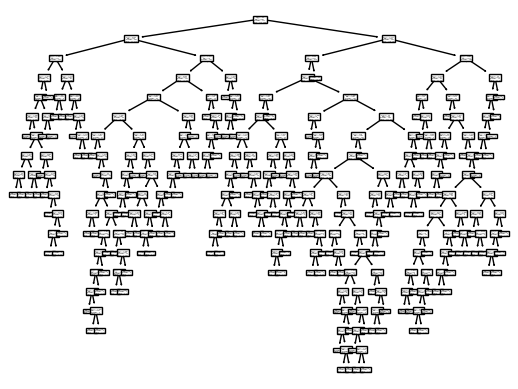

In [19]:
# ============================================================================================================================================================
# Cuarto árbol de decisión.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol4 = tree.DecisionTreeClassifier(criterion = 'gini', splitter = "best", max_depth = 40,  random_state = 123)
arbol4.fit(X_train, Y_train)
scores4 = cross_val_score(arbol4, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores4)
print(scores4.mean())

tree.plot_tree(arbol4)
tree.export_graphviz(decision_tree = arbol4, class_names = True, out_file = "arbolesPunto5\Arbol4.dot")

[0.77777778 0.80555556 0.83098592 0.81690141 0.76056338 0.74647887
 0.77464789 0.69014085 0.63380282 0.84507042]
0.7681924882629108


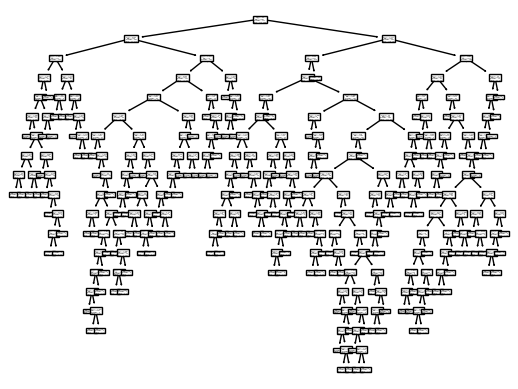

In [20]:
# ============================================================================================================================================================
# Quinto árbol de decisión.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol5 = tree.DecisionTreeClassifier(criterion = 'gini', splitter = "best", max_depth = 50,  random_state = 123)
arbol5.fit(X_train, Y_train)
scores5 = cross_val_score(arbol5, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores5)
print(scores5.mean())

tree.plot_tree(arbol5)
tree.export_graphviz(decision_tree = arbol5, class_names = True, out_file = "arbolesPunto5\Arbol5.dot")

[0.77777778 0.80555556 0.83098592 0.81690141 0.76056338 0.74647887
 0.77464789 0.69014085 0.63380282 0.84507042]
0.7681924882629108


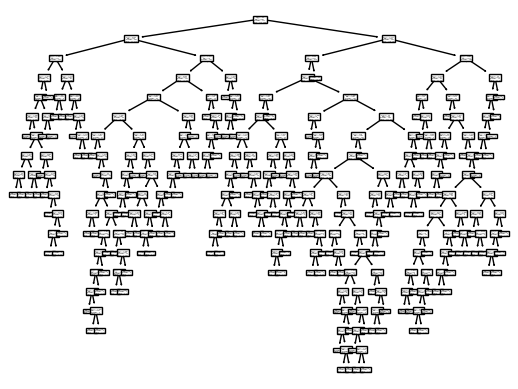

In [21]:
# ============================================================================================================================================================
# Sexto árbol de decisión.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol6 = tree.DecisionTreeClassifier(criterion = 'gini', splitter = "best", max_depth = 60,  random_state = 123)
arbol6.fit(X_train, Y_train)
scores6 = cross_val_score(arbol6, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores6)
print(scores6.mean())

tree.plot_tree(arbol6)
tree.export_graphviz(decision_tree = arbol6, class_names = True, out_file = "arbolesPunto5\Arbol6.dot")

[0.77777778 0.80555556 0.83098592 0.81690141 0.76056338 0.74647887
 0.77464789 0.69014085 0.63380282 0.84507042]
0.7681924882629108


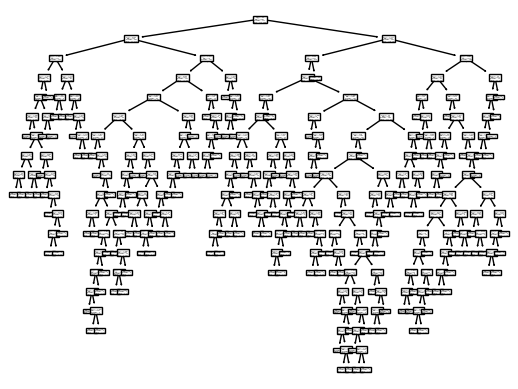

In [22]:
# ============================================================================================================================================================
# Séptimo árbol de decisión.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol7 = tree.DecisionTreeClassifier(criterion = 'gini', splitter = "best", max_depth = 70,  random_state = 123)
arbol7.fit(X_train, Y_train)
scores7 = cross_val_score(arbol7, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores7)
print(scores7.mean())

tree.plot_tree(arbol7)
tree.export_graphviz(decision_tree = arbol7, class_names = True, out_file = "arbolesPunto5\Arbol7.dot")


[0.77777778 0.80555556 0.83098592 0.81690141 0.76056338 0.74647887
 0.77464789 0.69014085 0.63380282 0.84507042]
0.7681924882629108


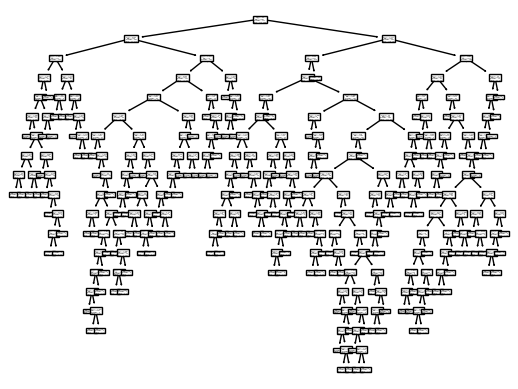

In [23]:
# ============================================================================================================================================================
# Octavo árbol de decisión.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol8 = tree.DecisionTreeClassifier(criterion = 'gini', splitter = "best", max_depth = 80,  random_state = 123)
arbol8.fit(X_train, Y_train)
scores8 = cross_val_score(arbol8, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores8)
print(scores8.mean())

tree.plot_tree(arbol8)
tree.export_graphviz(decision_tree = arbol8, class_names = True, out_file = "arbolesPunto5\Arbol8.dot")

[0.77777778 0.80555556 0.83098592 0.81690141 0.76056338 0.74647887
 0.77464789 0.69014085 0.63380282 0.84507042]
0.7681924882629108


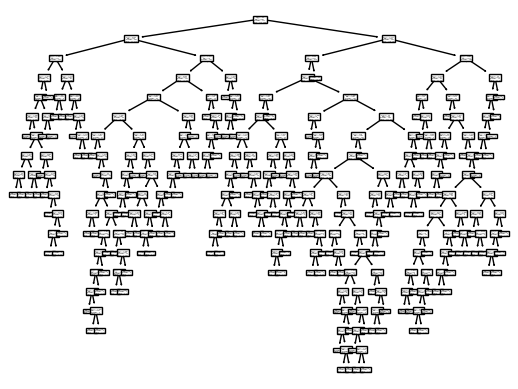

In [24]:
# ============================================================================================================================================================
# Noveno árbol de decisión.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol9 = tree.DecisionTreeClassifier(criterion = 'gini', splitter = "best", max_depth = 90,  random_state = 123)
arbol9.fit(X_train, Y_train)
scores9 = cross_val_score(arbol9, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores9)
print(scores9.mean())

tree.plot_tree(arbol9)
tree.export_graphviz(decision_tree = arbol9, class_names = True, out_file = "arbolesPunto5\Arbol9.dot")

[0.77777778 0.80555556 0.83098592 0.81690141 0.76056338 0.74647887
 0.77464789 0.69014085 0.63380282 0.84507042]
0.7681924882629108


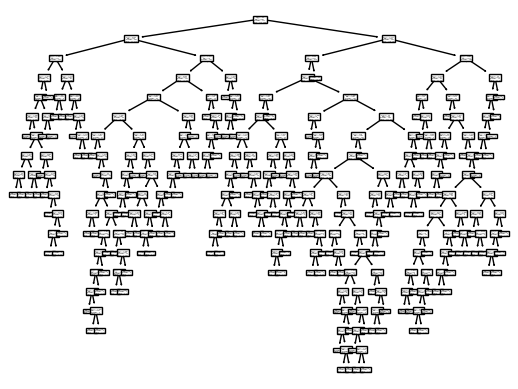

In [25]:
# ============================================================================================================================================================
# Décimo árbol de decisión.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol10 = tree.DecisionTreeClassifier(criterion = 'gini', splitter = "best", max_depth = 100,  random_state = 123)
arbol10.fit(X_train, Y_train)
scores10 = cross_val_score(arbol10, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores10)
print(scores10.mean())

tree.plot_tree(arbol10)
tree.export_graphviz(decision_tree = arbol10, class_names = True, out_file = "arbolesPunto5\Arbol10.dot")

#### 5.1 Usando los datos de prueba con cada árbol.

In [26]:
X_test = pipelineCompleto.transform(test_data)

In [27]:
# Con el primer árbol.

Y_predArbol1 = arbol1.predict(X_test)  
Y_predArbol1

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [28]:
# Con el segundo árbol.

Y_predArbol2 = arbol2.predict(X_test)  
Y_predArbol2

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [29]:
# Con el tercer árbol.

Y_predArbol3 = arbol3.predict(X_test)  
Y_predArbol3

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [30]:
# Con el cuarto árbol.

Y_predArbol4 = arbol4.predict(X_test)  
Y_predArbol4

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [31]:
# Con el quinto árbol.

Y_predArbol5 = arbol5.predict(X_test)  
Y_predArbol5

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [32]:
# Con el sexto árbol.

Y_predArbol6 = arbol6.predict(X_test)  
Y_predArbol6

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [33]:
# Con el séptimo árbol.

Y_predArbol7 = arbol7.predict(X_test)  
Y_predArbol7

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [34]:
# Con el octavo árbol.

Y_predArbol8 = arbol8.predict(X_test)  
Y_predArbol8

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [35]:
# Con el noveno árbol.

Y_predArbol9 = arbol9.predict(X_test)  
Y_predArbol9

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [36]:
# Con el décimo árbol.

Y_predArbol10 = arbol10.predict(X_test)  
Y_predArbol10

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [37]:
Y_test = test_data["survived"]

### 6. Tabla de resumen con los accuracy obtenidos.

In [38]:
# Obtener los valores de accuracy

from sklearn.metrics import accuracy_score

acArbol01 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol1
       )

acArbol02 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol2
       )

acArbol03 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol3
       )

acArbol04 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol4
       )

acArbol05 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol5
       )

acArbol06 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol6
       )

acArbol07 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol7
       )

acArbol08 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol8
       )

acArbol09 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol9
       )

acArbol10 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol10
       )

In [39]:
# Ingreso de los valores a la tabla.

listaAccuracy = [['Árbol01', acArbol01*100], ['Árbol02', acArbol02*100], ['Árbol03', acArbol03*100],
                 ['Árbol04', acArbol04*100], ['Árbol05', acArbol05*100], ['Árbol06', acArbol06*100],
                 ['Árbol07', acArbol07*100], ['Árbol08', acArbol08*100], ['Árbol09', acArbol09*100], ['Árbol10', acArbol10*100]]
Tabla = """\
+-----------------------------------+
| Árbol         Accuracy            |       
|-----------------------------------|
{}    
+-----------------------------------+\
"""
Tabla = (Tabla.format('\n'.join("| {:<13} {:<19} |".format(*fila)
 for fila in listaAccuracy)))
print (Tabla)

+-----------------------------------+
| Árbol         Accuracy            |       
|-----------------------------------|
| Árbol01       82.68156424581005   |
| Árbol02       82.68156424581005   |
| Árbol03       82.68156424581005   |
| Árbol04       82.68156424581005   |
| Árbol05       82.68156424581005   |
| Árbol06       82.68156424581005   |
| Árbol07       82.68156424581005   |
| Árbol08       82.68156424581005   |
| Árbol09       82.68156424581005   |
| Árbol10       82.68156424581005   |    
+-----------------------------------+


### 7. Cambio de hiperparámetros ->  criterion = entropy, splitter = best, y random_state = 123.

[0.81944444 0.81944444 0.87323944 0.77464789 0.81690141 0.74647887
 0.81690141 0.70422535 0.69014085 0.83098592]
0.7892410015649451


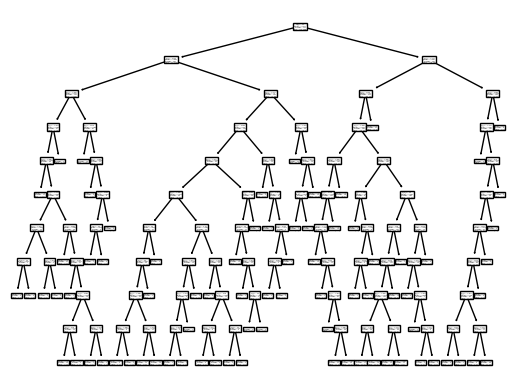

In [40]:
# ============================================================================================================================================================
# Primer árbol de decisión modificado.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol1M = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "best", max_depth = 10,  random_state = 123)
arbol1M.fit(X_train, Y_train)
scores1M = cross_val_score(arbol1M, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores1M)
print(scores1M.mean())

tree.plot_tree(arbol1M)
tree.export_graphviz(decision_tree = arbol1M, class_names = True, out_file = "arbolesPunto7\Arbol1M.dot")

[0.79166667 0.80555556 0.85915493 0.70422535 0.8028169  0.77464789
 0.78873239 0.74647887 0.69014085 0.81690141]
0.7780320813771517


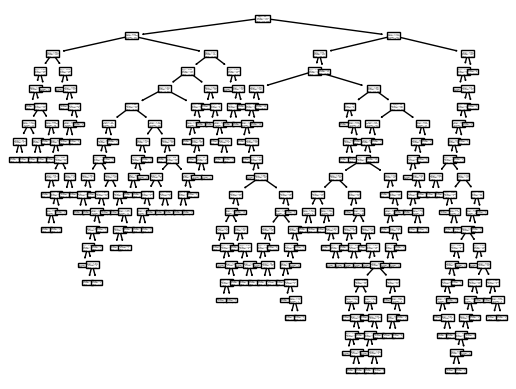

In [41]:
# ============================================================================================================================================================
# Segundo árbol de decisión modificado.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol2M = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "best", max_depth = 20,  random_state = 123)
arbol2M.fit(X_train, Y_train)
scores2M = cross_val_score(arbol2M, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores2M)
print(scores2M.mean())

tree.plot_tree(arbol2M)
tree.export_graphviz(decision_tree = arbol2M, class_names = True, out_file = "arbolesPunto7\Arbol2M.dot")

[0.83333333 0.80555556 0.85915493 0.70422535 0.8028169  0.76056338
 0.78873239 0.74647887 0.69014085 0.83098592]
0.7821987480438185


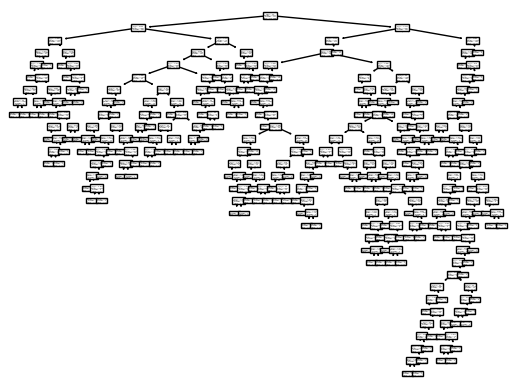

In [42]:
# ============================================================================================================================================================
# Tercer árbol de decisión modificado.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol3M = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "best", max_depth = 30,  random_state = 123)
arbol3M.fit(X_train, Y_train)
scores3M = cross_val_score(arbol3M, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores3M)
print(scores3M.mean())

tree.plot_tree(arbol3M)
tree.export_graphviz(decision_tree = arbol3M, class_names = True, out_file = "arbolesPunto7\Arbol3M.dot")

[0.83333333 0.80555556 0.85915493 0.70422535 0.8028169  0.76056338
 0.78873239 0.74647887 0.69014085 0.83098592]
0.7821987480438185


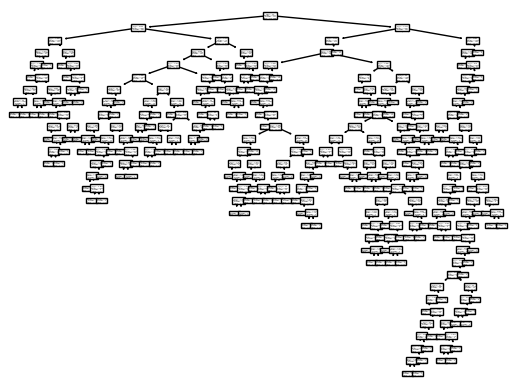

In [43]:
# ============================================================================================================================================================
# Cuarto árbol de decisión modificado.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol4M = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "best", max_depth = 40,  random_state = 123)
arbol4M.fit(X_train, Y_train)
scores4M = cross_val_score(arbol4M, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores4M)
print(scores4M.mean())

tree.plot_tree(arbol4M)
tree.export_graphviz(decision_tree = arbol4M, class_names = True, out_file = "arbolesPunto7\Arbol4M.dot")

[0.83333333 0.80555556 0.85915493 0.70422535 0.8028169  0.76056338
 0.78873239 0.74647887 0.69014085 0.83098592]
0.7821987480438185


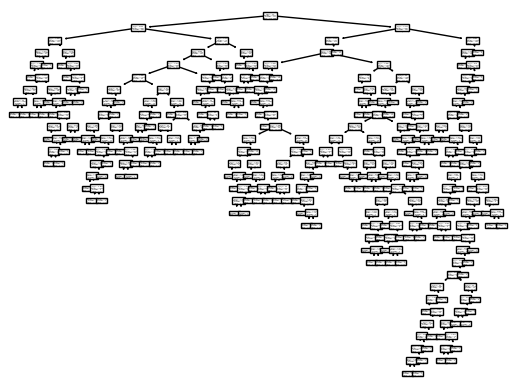

In [44]:
# ============================================================================================================================================================
# Quinto árbol de decisión modificado.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol5M = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "best", max_depth = 50,  random_state = 123)
arbol5M.fit(X_train, Y_train)
scores5M = cross_val_score(arbol5M, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores5M)
print(scores5M.mean())

tree.plot_tree(arbol5M)
tree.export_graphviz(decision_tree = arbol5M, class_names = True, out_file = "arbolesPunto7\Arbol5M.dot")

[0.83333333 0.80555556 0.85915493 0.70422535 0.8028169  0.76056338
 0.78873239 0.74647887 0.69014085 0.83098592]
0.7821987480438185


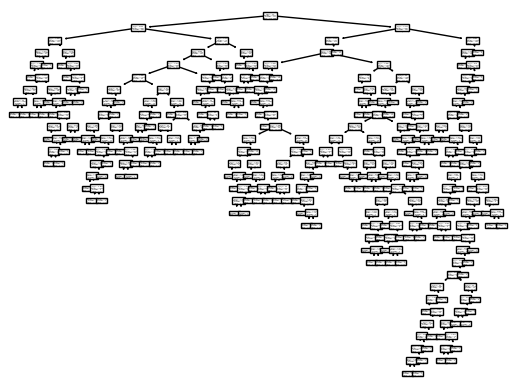

In [45]:
# ============================================================================================================================================================
# Sexto árbol de decisión modificado.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol6M = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "best", max_depth = 60,  random_state = 123)
arbol6M.fit(X_train, Y_train)
scores6M = cross_val_score(arbol6M, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores6M)
print(scores6M.mean())

tree.plot_tree(arbol6M)
tree.export_graphviz(decision_tree = arbol6M, class_names = True, out_file = "arbolesPunto7\Arbol6M.dot")

[0.83333333 0.80555556 0.85915493 0.70422535 0.8028169  0.76056338
 0.78873239 0.74647887 0.69014085 0.83098592]
0.7821987480438185


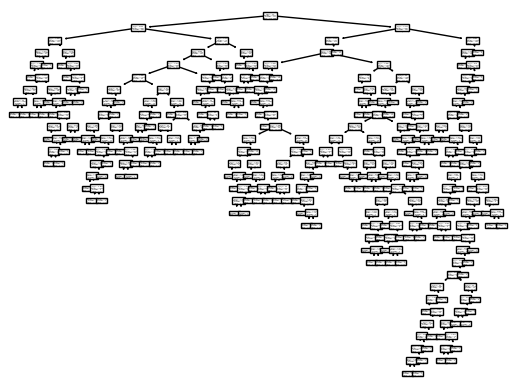

In [46]:
# ============================================================================================================================================================
# Séptimo árbol de decisión modificado.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol7M = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "best", max_depth = 70,  random_state = 123)
arbol7M.fit(X_train, Y_train)
scores7M = cross_val_score(arbol7M, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores7M)
print(scores7M.mean())

tree.plot_tree(arbol7M)
tree.export_graphviz(decision_tree = arbol7M, class_names = True, out_file = "arbolesPunto7\Arbol7M.dot")

[0.83333333 0.80555556 0.85915493 0.70422535 0.8028169  0.76056338
 0.78873239 0.74647887 0.69014085 0.83098592]
0.7821987480438185


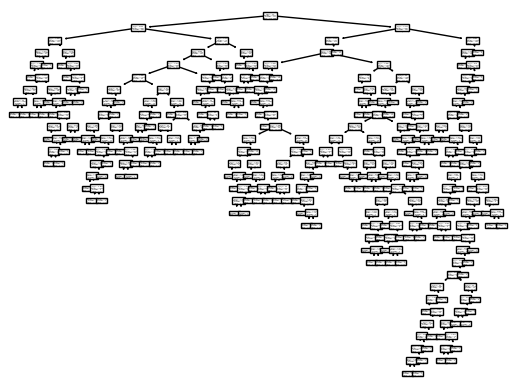

In [47]:
# ============================================================================================================================================================
# Octavo árbol de decisión modificado.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol8M = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "best", max_depth = 80,  random_state = 123)
arbol8M.fit(X_train, Y_train)
scores8M = cross_val_score(arbol8M, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores8M)
print(scores8M.mean())

tree.plot_tree(arbol8M)
tree.export_graphviz(decision_tree = arbol8M, class_names = True, out_file = "arbolesPunto7\Arbol8M.dot")

[0.83333333 0.80555556 0.85915493 0.70422535 0.8028169  0.76056338
 0.78873239 0.74647887 0.69014085 0.83098592]
0.7821987480438185


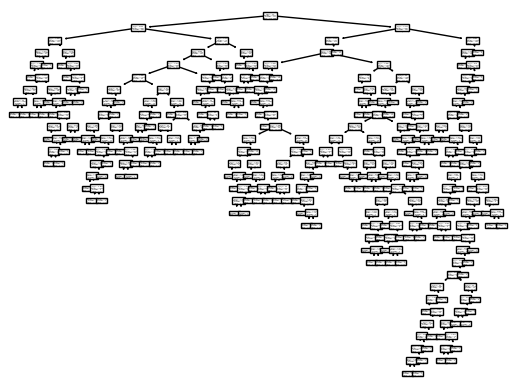

In [48]:
# ============================================================================================================================================================
# Noveno árbol de decisión modificado.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol9M = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "best", max_depth = 90,  random_state = 123)
arbol9M.fit(X_train, Y_train)
scores9M = cross_val_score(arbol9M, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores9M)
print(scores9M.mean())

tree.plot_tree(arbol9M)
tree.export_graphviz(decision_tree = arbol9M, class_names = True, out_file = "arbolesPunto7\Arbol9M.dot")

[0.83333333 0.80555556 0.85915493 0.70422535 0.8028169  0.76056338
 0.78873239 0.74647887 0.69014085 0.83098592]
0.7821987480438185


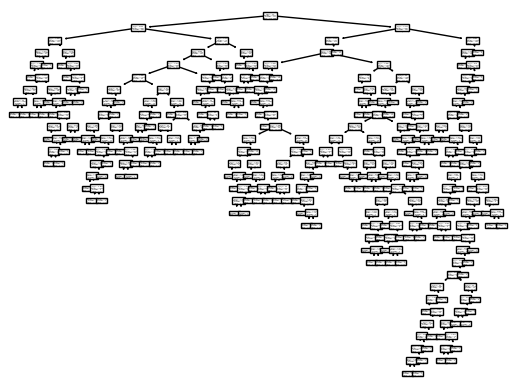

In [49]:
# ============================================================================================================================================================
# Décimo árbol de decisión modificado.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol10M = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "best", max_depth = 100,  random_state = 123)
arbol10M.fit(X_train, Y_train)
scores10M = cross_val_score(arbol10M, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores10M)
print(scores10M.mean())

tree.plot_tree(arbol10M)
tree.export_graphviz(decision_tree = arbol10M, class_names = True, out_file = "arbolesPunto7\Arbol10M.dot")

#### 7.1 Usando los datos de prueba con cada árbol modificado.

In [50]:
# Con el primer árbol modificado.

Y_predArbol1M = arbol1M.predict(X_test)
Y_predArbol1M

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [51]:
# Con el segundo árbol modificado.

Y_predArbol2M = arbol2M.predict(X_test)
Y_predArbol2M

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [52]:
# Con el tercer árbol modificado.

Y_predArbol3M = arbol3M.predict(X_test)
Y_predArbol3M

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [53]:
# Con el cuarto árbol modificado.

Y_predArbol4M = arbol4M.predict(X_test)
Y_predArbol4M

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [54]:
# Con el quinto árbol modificado.

Y_predArbol5M = arbol5M.predict(X_test)
Y_predArbol5M

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [55]:
# Con el sexto árbol modificado.

Y_predArbol6M = arbol6M.predict(X_test)
Y_predArbol6M

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [56]:
# Con el séptimo árbol modificado.

Y_predArbol7M = arbol7M.predict(X_test)
Y_predArbol7M

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [57]:
# Con el octavo árbol modificado.

Y_predArbol8M = arbol8M.predict(X_test)
Y_predArbol8M

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [58]:
# Con el noveno árbol modificado.

Y_predArbol9M = arbol9M.predict(X_test)
Y_predArbol9M

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [59]:
# Con el décimo árbol modificado.

Y_predArbol10M = arbol10M.predict(X_test)
Y_predArbol10M

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

#### 7.2 Tabla de comparación.

In [60]:
# Obtener los valores de accuracy de los árboles modificados.

from sklearn.metrics import accuracy_score

acArbol01M = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol1M
       )

acArbol02M = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol2M
       )

acArbol03M = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol3M
       )

acArbol04M = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol4M
       )

acArbol05M = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol5M
       )

acArbol06M = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol6M
       )

acArbol07M = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol7M
       )

acArbol08M = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol8M
       )

acArbol09M = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol9M
       )

acArbol10M = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol10M
       )

In [61]:
# Ingreso de los valores a la tabla.

listaAccuracy = [['Árbol01', acArbol01*100, 'Árbol01M', acArbol01M*100], ['Árbol02', acArbol02*100, 'Árbol02M', acArbol02M*100], 
                 ['Árbol03', acArbol03*100, 'Árbol03M', acArbol03M*100], ['Árbol04', acArbol04*100, 'Árbol05M', acArbol05M*100],
                 ['Árbol06', acArbol06*100, 'Árbol06M', acArbol06M*100], ['Árbol07', acArbol07*100, 'Árbol07M', acArbol07M*100],
                 ['Árbol08', acArbol08*100, 'Árbol08M', acArbol08M*100], ['Árbol09', acArbol09*100, 'Árbol09M', acArbol09M*100],
                 ['Árbol10', acArbol10*100, 'Árbol10M', acArbol10M*100]]
Tabla = """\
+-----------------------------------------------------------------+
| Árbol         Accuracy           ÁrbolM         AccuracyM       |       
|-----------------------------------------------------------------|
{}    
+-----------------------------------------------------------------+\
"""
Tabla = (Tabla.format('\n'.join("| {:<11} {:<20} {:<11} {:<18} |".format(*fila)
 for fila in listaAccuracy)))
print (Tabla)

+-----------------------------------------------------------------+
| Árbol         Accuracy           ÁrbolM         AccuracyM       |       
|-----------------------------------------------------------------|
| Árbol01     82.68156424581005    Árbol01M    84.35754189944134  |
| Árbol02     82.68156424581005    Árbol02M    80.44692737430168  |
| Árbol03     82.68156424581005    Árbol03M    78.77094972067039  |
| Árbol04     82.68156424581005    Árbol05M    78.77094972067039  |
| Árbol06     82.68156424581005    Árbol06M    78.77094972067039  |
| Árbol07     82.68156424581005    Árbol07M    78.77094972067039  |
| Árbol08     82.68156424581005    Árbol08M    78.77094972067039  |
| Árbol09     82.68156424581005    Árbol09M    78.77094972067039  |
| Árbol10     82.68156424581005    Árbol10M    78.77094972067039  |    
+-----------------------------------------------------------------+


### 8. Cambio de hiperparámetros ->  criterion = entropy, splitter = random, y random_state = 123.

[0.84722222 0.79166667 0.77464789 0.84507042 0.8028169  0.73239437
 0.81690141 0.67605634 0.74647887 0.84507042]
0.7878325508607199


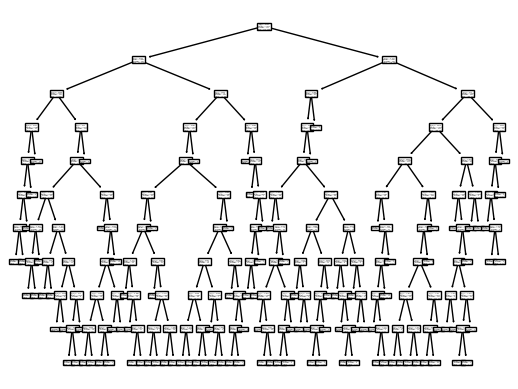

In [62]:
# ============================================================================================================================================================
# Primer árbol de decisión modificado por segunda vez.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol1M2 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random", max_depth = 10,  random_state = 123)
arbol1M2.fit(X_train, Y_train)
scores1M2 = cross_val_score(arbol1M2, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores1M2)
print(scores1M2.mean())

tree.plot_tree(arbol1M2)
tree.export_graphviz(decision_tree = arbol1M2, class_names = True, out_file = "arbolesPunto8\Arbol1M2.dot")

[0.81944444 0.83333333 0.81690141 0.71830986 0.77464789 0.77464789
 0.8028169  0.64788732 0.63380282 0.74647887]
0.7568270735524257


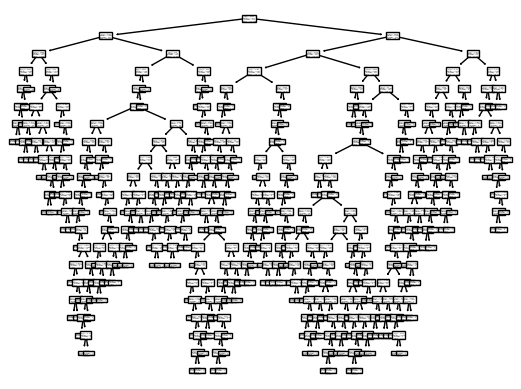

In [63]:
# ============================================================================================================================================================
# Segundo árbol de decisión modificado por segunda vez.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol2M2 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random", max_depth = 20,  random_state = 123)
arbol2M2.fit(X_train, Y_train)
scores2M2 = cross_val_score(arbol2M2, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores2M2)
print(scores2M2.mean())

tree.plot_tree(arbol2M2)
tree.export_graphviz(decision_tree = arbol2M2, class_names = True, out_file = "arbolesPunto8\Arbol2M2.dot")

[0.83333333 0.84722222 0.85915493 0.71830986 0.77464789 0.77464789
 0.71830986 0.64788732 0.61971831 0.76056338]
0.7553794992175275


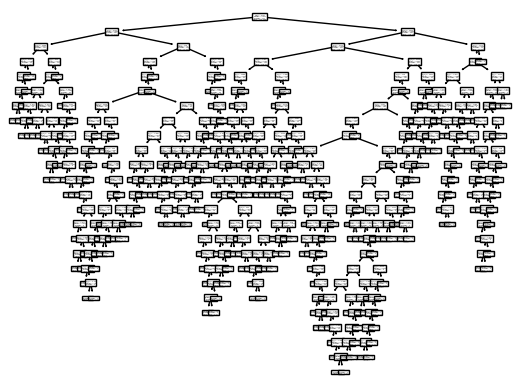

In [64]:
# ============================================================================================================================================================
# Tercer árbol de decisión modificado por segunda vez.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol3M2 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random", max_depth = 30,  random_state = 123)
arbol3M2.fit(X_train, Y_train)
scores3M2 = cross_val_score(arbol3M2, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores3M2)
print(scores3M2.mean())

tree.plot_tree(arbol3M2)
tree.export_graphviz(decision_tree = arbol3M2, class_names = True, out_file = "arbolesPunto8\Arbol3M2.dot")

[0.83333333 0.84722222 0.85915493 0.71830986 0.77464789 0.77464789
 0.71830986 0.64788732 0.61971831 0.76056338]
0.7553794992175275


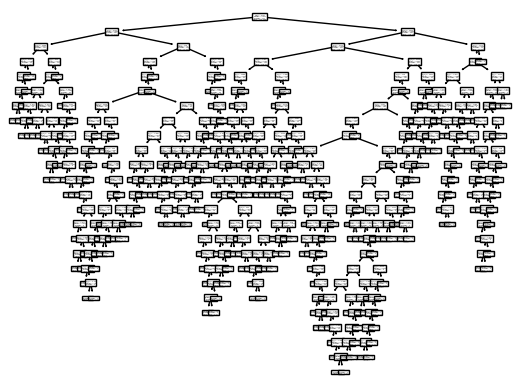

In [65]:
# ============================================================================================================================================================
# Cuarto árbol de decisión modificado por segunda vez.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol4M2 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random", max_depth = 40,  random_state = 123)
arbol4M2.fit(X_train, Y_train)
scores4M2 = cross_val_score(arbol4M2, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores4M2)
print(scores4M2.mean())

tree.plot_tree(arbol4M2)
tree.export_graphviz(decision_tree = arbol4M2, class_names = True, out_file = "arbolesPunto8\Arbol4M2.dot")

[0.83333333 0.84722222 0.85915493 0.71830986 0.77464789 0.77464789
 0.71830986 0.64788732 0.61971831 0.76056338]
0.7553794992175275


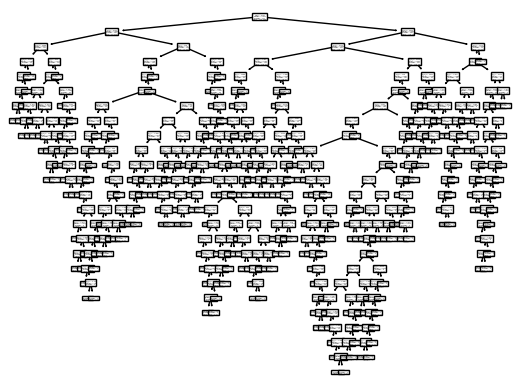

In [66]:
# ============================================================================================================================================================
# Quinto árbol de decisión modificado por segunda vez.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol5M2 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random", max_depth = 50,  random_state = 123)
arbol5M2.fit(X_train, Y_train)
scores5M2 = cross_val_score(arbol5M2, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores5M2)
print(scores5M2.mean())

tree.plot_tree(arbol5M2)
tree.export_graphviz(decision_tree = arbol5M2, class_names = True, out_file = "arbolesPunto8\Arbol5M2.dot")

[0.83333333 0.84722222 0.85915493 0.71830986 0.77464789 0.77464789
 0.71830986 0.64788732 0.61971831 0.76056338]
0.7553794992175275


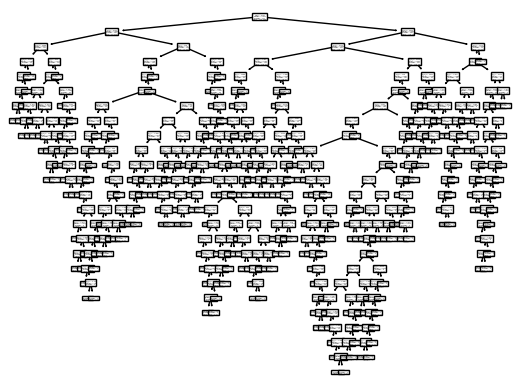

In [67]:
# ============================================================================================================================================================
# Sexto árbol de decisión modificado por segunda vez.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol6M2 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random", max_depth = 60,  random_state = 123)
arbol6M2.fit(X_train, Y_train)
scores6M2 = cross_val_score(arbol6M2, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores6M2)
print(scores6M2.mean())

tree.plot_tree(arbol6M2)
tree.export_graphviz(decision_tree = arbol6M2, class_names = True, out_file = "arbolesPunto8\Arbol6M2.dot")

[0.83333333 0.84722222 0.85915493 0.71830986 0.77464789 0.77464789
 0.71830986 0.64788732 0.61971831 0.76056338]
0.7553794992175275


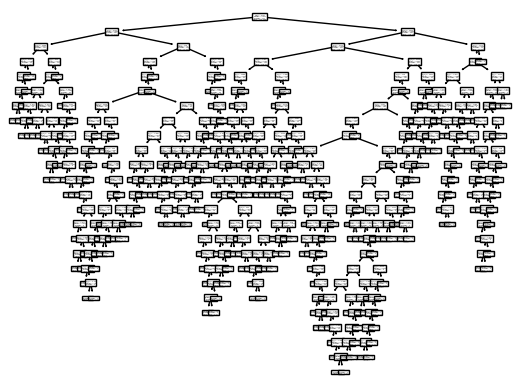

In [68]:
# ============================================================================================================================================================
# Séptimo árbol de decisión modificado por segunda vez.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol7M2 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random", max_depth = 70,  random_state = 123)
arbol7M2.fit(X_train, Y_train)
scores7M2 = cross_val_score(arbol7M2, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores7M2)
print(scores7M2.mean())

tree.plot_tree(arbol7M2)
tree.export_graphviz(decision_tree = arbol7M2, class_names = True, out_file = "arbolesPunto8\Arbol7M2.dot")

[0.83333333 0.84722222 0.85915493 0.71830986 0.77464789 0.77464789
 0.71830986 0.64788732 0.61971831 0.76056338]
0.7553794992175275


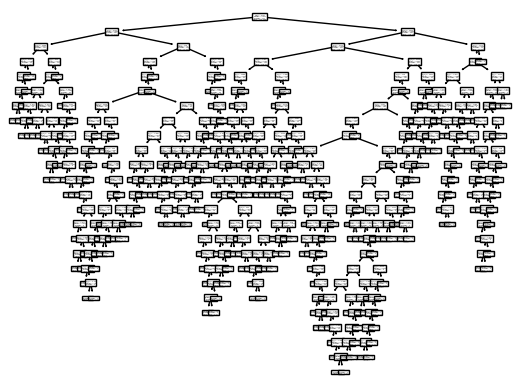

In [69]:
# ============================================================================================================================================================
# Octavo árbol de decisión modificado por segunda vez.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol8M2 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random", max_depth = 80,  random_state = 123)
arbol8M2.fit(X_train, Y_train)
scores8M2 = cross_val_score(arbol8M2, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores8M2)
print(scores8M2.mean())

tree.plot_tree(arbol8M2)
tree.export_graphviz(decision_tree = arbol8M2, class_names = True, out_file = "arbolesPunto8\Arbol8M2.dot")

[0.83333333 0.84722222 0.85915493 0.71830986 0.77464789 0.77464789
 0.71830986 0.64788732 0.61971831 0.76056338]
0.7553794992175275


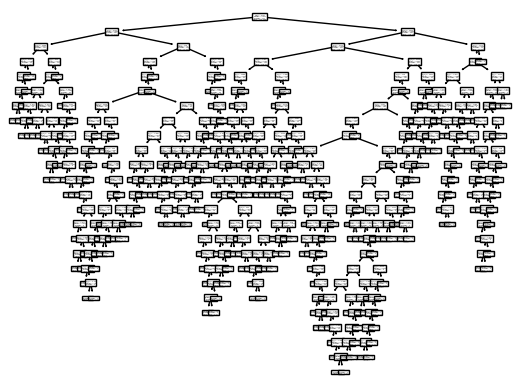

In [70]:
# ============================================================================================================================================================
# Noveno árbol de decisión modificado por segunda vez.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol9M2 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random", max_depth = 90,  random_state = 123)
arbol9M2.fit(X_train, Y_train)
scores9M2 = cross_val_score(arbol9M2, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores9M2)
print(scores9M2.mean())

tree.plot_tree(arbol9M2)
tree.export_graphviz(decision_tree = arbol9M2, class_names = True, out_file = "arbolesPunto8\Arbol9M2.dot")

[0.83333333 0.84722222 0.85915493 0.71830986 0.77464789 0.77464789
 0.71830986 0.64788732 0.61971831 0.76056338]
0.7553794992175275


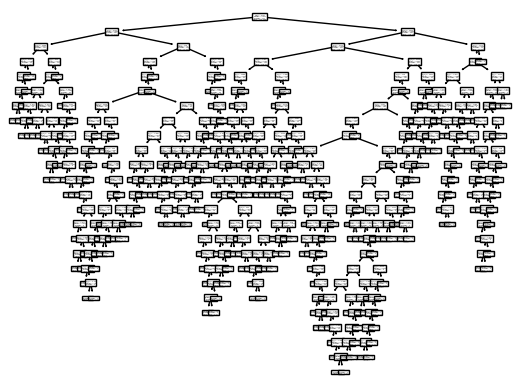

In [71]:
# ============================================================================================================================================================
# Décimo árbol de decisión modificado por segunda vez.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbol10M2 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random", max_depth = 100,  random_state = 123)
arbol10M2.fit(X_train, Y_train)
scores10M2 = cross_val_score(arbol10M2, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scores10M2)
print(scores10M2.mean())

tree.plot_tree(arbol10M2)
tree.export_graphviz(decision_tree = arbol10M2, class_names = True, out_file = "arbolesPunto8\Arbol10M2.dot")

#### 8.1 Usando los datos de prueba con cada árbol modificado.

In [72]:
# Con el primer árbol modificado por segunda vez.

Y_predArbol1M2 = arbol1M2.predict(X_test)
Y_predArbol1M2

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [73]:
# Con el segundo árbol modificado por segunda vez.

Y_predArbol2M2 = arbol2M2.predict(X_test)
Y_predArbol2M2

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [74]:
# Con el tercer árbol modificado por segunda vez.

Y_predArbol3M2 = arbol3M2.predict(X_test)
Y_predArbol3M2

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [75]:
# Con el cuarto árbol modificado por segunda vez.

Y_predArbol4M2 = arbol4M2.predict(X_test)
Y_predArbol4M2

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [76]:
# Con el cinco árbol modificado por segunda vez.

Y_predArbol5M2 = arbol5M2.predict(X_test)
Y_predArbol5M2

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [77]:
# Con el sexto árbol modificado por segunda vez.

Y_predArbol6M2 = arbol6M2.predict(X_test)
Y_predArbol6M2

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [78]:
# Con el séptimo árbol modificado por segunda vez.

Y_predArbol7M2 = arbol7M2.predict(X_test)
Y_predArbol7M2

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [79]:
# Con el octavo árbol modificado por segunda vez.

Y_predArbol8M2 = arbol8M2.predict(X_test)
Y_predArbol8M2

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [80]:
# Con el noveno árbol modificado por segunda vez.

Y_predArbol9M2 = arbol9M2.predict(X_test)
Y_predArbol9M2

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

In [81]:
# Con el décimo árbol modificado por segunda vez.

Y_predArbol10M2 = arbol10M2.predict(X_test)
Y_predArbol10M2

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1], dtype=int64)

#### 8.2 Tabla de comparación actualizada.

In [82]:
# Obtener los valores de accuracy de los árboles modificados.

from sklearn.metrics import accuracy_score

acArbol01M2 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol1M2
       )

acArbol02M2 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol2M2
       )

acArbol03M2 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol3M2
       )

acArbol04M2 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol4M2
       )

acArbol05M2 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol5M2
       )

acArbol06M2 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol6M2
       )

acArbol07M2 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol7M2
       )

acArbol08M2 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol8M2
       )

acArbol09M2 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol9M2
       )

acArbol10M2 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbol10M2
       )

In [83]:
# Ingreso de los valores a la tabla.

listaAccuracy = [['Árbol01', acArbol01*100, 'Árbol01M', acArbol01M*100, 'Árbol01M2', acArbol01M2*100], 
                 ['Árbol02', acArbol02*100, 'Árbol02M', acArbol02M*100, 'Árbol02M2', acArbol02M2*100], 
                 ['Árbol03', acArbol03*100, 'Árbol03M', acArbol03M*100, 'Árbol03M2', acArbol03M2*100], 
                 ['Árbol04', acArbol04*100, 'Árbol04M', acArbol04M*100, 'Árbol04M2', acArbol04M2*100],
                 ['Árbol05', acArbol05*100, 'Árbol05M', acArbol05M*100, 'Árbol05M2', acArbol05M2*100],
                 ['Árbol06', acArbol06*100, 'Árbol06M', acArbol06M*100, 'Árbol06M2', acArbol06M2*100], 
                 ['Árbol07', acArbol07*100, 'Árbol07M', acArbol07M*100, 'Árbol07M2', acArbol07M2*100],
                 ['Árbol08', acArbol08*100, 'Árbol08M', acArbol08M*100, 'Árbol08M2', acArbol08M2*100], 
                 ['Árbol09', acArbol09*100, 'Árbol09M', acArbol09M*100, 'Árbol09M2', acArbol09M2*100],
                 ['Árbol10', acArbol10*100, 'Árbol10M', acArbol10M*100, 'Árbol10M2', acArbol10M2*100]]
Tabla = """\
+--------------------------------------------------------------------------------------------------------+
| Árbol         Accuracy           ÁrbolM         AccuracyM           ÁrbolM2         AccuracyM2         |       
|--------------------------------------------------------------------------------------------------------|
{}    
+--------------------------------------------------------------------------------------------------------+\
"""
Tabla = (Tabla.format('\n'.join("| {:<11} {:<20} {:<14} {:<19} {:<15} {:<18} |".format(*fila)
 for fila in listaAccuracy)))
print (Tabla)

+--------------------------------------------------------------------------------------------------------+
| Árbol         Accuracy           ÁrbolM         AccuracyM           ÁrbolM2         AccuracyM2         |       
|--------------------------------------------------------------------------------------------------------|
| Árbol01     82.68156424581005    Árbol01M       84.35754189944134   Árbol01M2       86.03351955307262  |
| Árbol02     82.68156424581005    Árbol02M       80.44692737430168   Árbol02M2       79.88826815642457  |
| Árbol03     82.68156424581005    Árbol03M       78.77094972067039   Árbol03M2       78.77094972067039  |
| Árbol04     82.68156424581005    Árbol04M       78.77094972067039   Árbol04M2       78.77094972067039  |
| Árbol05     82.68156424581005    Árbol05M       78.77094972067039   Árbol05M2       78.77094972067039  |
| Árbol06     82.68156424581005    Árbol06M       78.77094972067039   Árbol06M2       78.77094972067039  |
| Árbol07     82.6815642458100

### 9. Hiperparámetros que por el momento obtienen el árbol con mayor accuracy.

##### Después de ejecutar los 10 árboles por cada modificación de hiperparámetros en los puntos 5, 7 y 8, los que obtuvieron un mayor accuracy fueron los propuestos por el último punto mencionado:

##### --> criterion = 'entropy', splitter = "random", max_depth = 10, random_state = 123

### 10. Variación de hiperparámetro nuevo escogido de la documentación.

[0.80555556 0.84722222 0.85915493 0.81690141 0.85915493 0.81690141
 0.8028169  0.70422535 0.76056338 0.84507042]
La precisión del árbol variado es: 86.59217877094973%


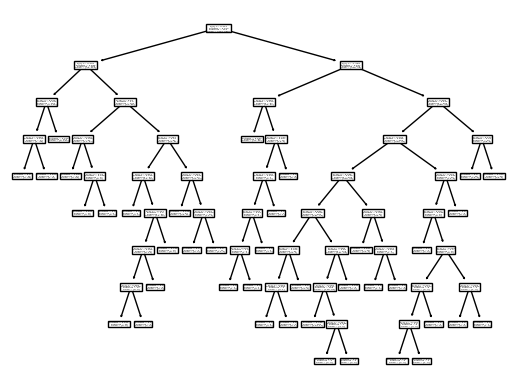

In [92]:
# El hiperparámetro escogido es "max_leaf_nodes" 

# ============================================================================================================================================================
# Árbol con la primera variación del hiperparámetro escogido.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbolVariado1 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random", max_leaf_nodes = 39, max_depth = 10, random_state = 123)
arbolVariado1.fit(X_train, Y_train)
scoresVariado1 = cross_val_score(arbolVariado1, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scoresVariado1)

Y_predArbolVariado1 = arbolVariado1.predict(X_test)  
Y_predArbolVariado1

acArbolVariado1 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbolVariado1
       )
print(f"La precisión del árbol variado es: {acArbolVariado1 * 100}%")

tree.plot_tree(arbolVariado1)
tree.export_graphviz(decision_tree = arbolVariado1, class_names = True, out_file = "arbolesPunto10\ArbolVariado1.dot")

[0.75       0.84722222 0.74647887 0.88732394 0.8028169  0.8028169
 0.78873239 0.64788732 0.74647887 0.81690141]
La precisión del árbol variado es: 81.00558659217877%


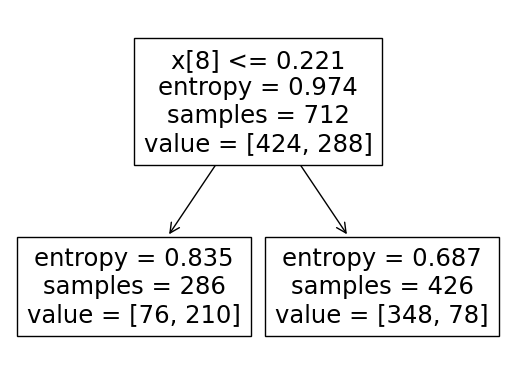

In [93]:
# ============================================================================================================================================================
# Árbol con la segunda variación del hiperparámetro escogido.
# ============================================================================================================================================================

from sklearn import tree
from sklearn.model_selection import cross_val_score

arbolVariado2 = tree.DecisionTreeClassifier(criterion = 'entropy', splitter = "random", max_leaf_nodes = 2, max_depth = 10, random_state = 123)
arbolVariado2.fit(X_train, Y_train)
scoresVariado2 = cross_val_score(arbolVariado2, X_train, Y_train, cv = 10, scoring = 'accuracy')
print(scoresVariado2)

Y_predArbolVariado2 = arbolVariado2.predict(X_test)  
Y_predArbolVariado2

acArbolVariado2 = accuracy_score(
        y_true  = Y_test,
        y_pred  = Y_predArbolVariado2
       )
print(f"La precisión del árbol variado es: {acArbolVariado2 * 100}%")

tree.plot_tree(arbolVariado2)
tree.export_graphviz(decision_tree = arbolVariado2, class_names = True, out_file = "arbolesPunto10\ArbolVariado2.dot")

##### Podemos observar que al variar el hiperparámetro "max_leaf_nodes" con un valor de 39, el árbol mejora su exactitud. En cambio, cuando se realizó la segunda variación, a un valor de 2, la exactitud del modelo empeoró.